<a href="https://colab.research.google.com/github/JonathanMitchell1234/TeslaStockPredictiveModeling/blob/main/TeslaAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_tesla = pd.read_csv("TSLA Data Download (1).csv")
print(df_tesla.head())
print(df_tesla.shape)

         Date    Open    High     Low   Close       Volume
0  03/18/2025  228.16  230.10  222.28  225.31  111,477,602
1  03/17/2025  245.06  245.40  232.80  238.01  111,900,602
2  03/14/2025  247.31  251.58  240.73  249.98  100,242,305
3  03/13/2025  248.13  248.29  232.60  240.68  114,813,508
4  03/12/2025  247.22  251.84  241.10  248.09  142,215,703
(251, 6)


## Data exploration

### Subtask:
Explore the loaded Tesla stock data to understand its characteristics and identify potential issues.


In [ ]:
# Check for missing values
print("Missing values:\n", df_tesla.isnull().sum())

# Examine data types
print("\nData types:\n", df_tesla.dtypes)

# Convert 'Date' column to datetime
df_tesla['Date'] = pd.to_datetime(df_tesla['Date'])

# Convert 'Volume' to numeric
df_tesla['Volume'] = df_tesla['Volume'].str.replace(',', '').astype(float)

# Calculate descriptive statistics
print("\nDescriptive statistics:\n", df_tesla.describe())

# Analyze target variable distribution (Close)
print("\nTarget variable distribution (Close):")
print(df_tesla['Close'].describe())

# You can add a histogram or density plot here to visualize the distribution of 'Close'
# import matplotlib.pyplot as plt
# plt.hist(df_tesla['Close'], bins=20)
# plt.xlabel('Close Price')
# plt.ylabel('Frequency')
# plt.title('Distribution of Close Price')
# plt.show()

Missing values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Data types:
 Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

Descriptive statistics:
                                 Date        Open        High         Low  \
count                            251  251.000000  251.000000  251.000000   
mean   2024-09-15 01:03:06.454183168  261.022669  266.817171  254.507530   
min              2024-03-18 00:00:00  140.560000  144.440000  138.800000   
25%              2024-06-15 12:00:00  184.825000  187.765000  181.615000   
50%              2024-09-16 00:00:00  234.000000  242.790000  226.880000   
75%              2024-12-12 12:00:00  339.435000  346.120000  327.855000   
max              2025-03-18 00:00:00  475.900000  488.540000  457.510000   
std                              NaN   86.457796   88.656840   83.291175   

            Close        Volume  
count  251.000000

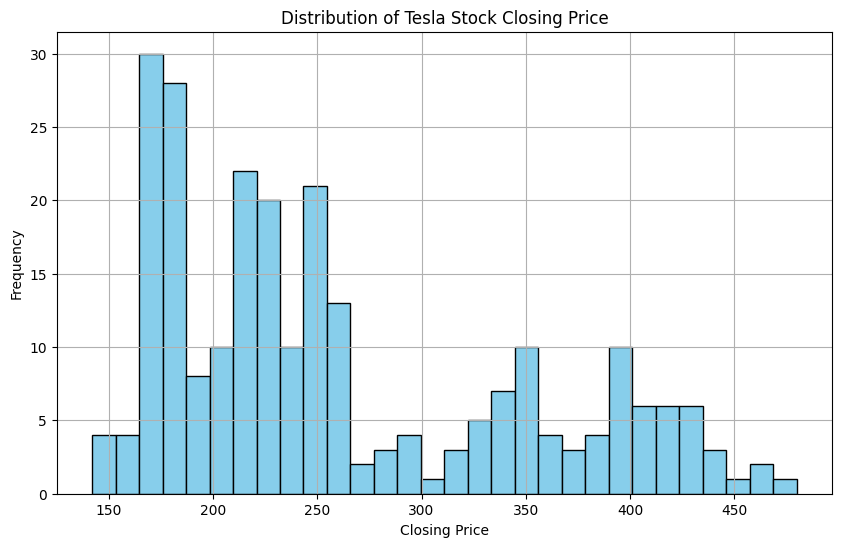

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_tesla['Close'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Tesla Stock Closing Price')
plt.grid(True)
plt.show()

## Data wrangling

### Subtask:
Prepare the data for modeling by handling missing values, creating new features, and potentially transforming existing features.


In [ ]:
# Ensure no missing values
print("Missing values:\n", df_tesla.isnull().sum())

# Create moving averages
df_tesla['MA7'] = df_tesla['Close'].rolling(window=7).mean()
df_tesla['MA30'] = df_tesla['Close'].rolling(window=30).mean()
df_tesla['MA90'] = df_tesla['Close'].rolling(window=90).mean()

# Calculate Rate of Change (ROC)
df_tesla['ROC'] = df_tesla['Close'].pct_change(periods=1)

# Create target variable (closing price one month from now)
df_tesla['Close_1Month'] = df_tesla['Close'].shift(-20)  # Assuming 20 trading days in a month

# Drop rows with NaN values (created by shifting)
df_tesla.dropna(inplace=True)

Missing values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


## Feature engineering

### Subtask:
Engineer additional features that might improve model performance.


In [ ]:
# Calculate the change in trading volume
df_tesla['Volume_Change'] = df_tesla['Volume'].diff()

# Calculate the difference between the opening and closing prices
df_tesla['Open_Close_Diff'] = df_tesla['Open'] - df_tesla['Close']

# Calculate the Relative Strength Index (RSI)
delta = df_tesla['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
df_tesla['RSI'] = rsi

# Print the correlation matrix to understand the relationship between variables.
correlation_matrix = df_tesla.corr()
print(correlation_matrix)

                     Date      Open      High       Low     Close    Volume  \
Date             1.000000  0.793824  0.779496  0.800625  0.789166 -0.180199   
Open             0.793824  1.000000  0.992763  0.993117  0.981429  0.170089   
High             0.779496  0.992763  1.000000  0.993121  0.992091  0.233468   
Low              0.800625  0.993117  0.993121  1.000000  0.993355  0.159122   
Close            0.789166  0.981429  0.992091  0.993355  1.000000  0.209154   
Volume          -0.180199  0.170089  0.233468  0.159122  0.209154  1.000000   
MA7              0.822870  0.895191  0.905005  0.909157  0.911781  0.152078   
MA30             0.889038  0.678405  0.668094  0.690462  0.679199 -0.130711   
MA90             0.976036  0.721459  0.702137  0.730254  0.716351 -0.219185   
ROC             -0.007157  0.117197  0.113514  0.124959  0.132530 -0.030954   
Close_1Month     0.806554  0.506324  0.495217  0.506784  0.501693 -0.229981   
Volume_Change    0.005484  0.087222  0.115698  0.073

In [ ]:
# Analyze the correlation between the new features and the target variable
correlation_with_target = df_tesla[['Volume_Change', 'Open_Close_Diff', 'RSI', 'Close_1Month']].corr()['Close_1Month']
print(correlation_with_target)

Volume_Change      0.003626
Open_Close_Diff    0.028574
RSI                0.026710
Close_1Month       1.000000
Name: Close_1Month, dtype: float64


## Data splitting

### Subtask:
Split the dataset into training, validation, and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

X = df_tesla.drop('Close_1Month', axis=1)
y = df_tesla['Close_1Month']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

## Model training

### Subtask:
Train a regression model to predict the Tesla stock price one month from now.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create an imputer to handle missing values in RSI column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val_scaled)

## Model evaluation

### Subtask:
Evaluate the performance of the trained Linear Regression model on the validation set.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the MSE
mse = mean_squared_error(y_val, y_pred_val)

# Calculate the RMSE
rmse = mse**0.5

# Calculate the MAE
mae = mean_absolute_error(y_val, y_pred_val)

# Calculate the R2 score
r2 = r2_score(y_val, y_pred_val)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 224.73
Root Mean Squared Error (RMSE): 14.99
Mean Absolute Error (MAE): 10.80
R-squared (R2) Score: 0.73


## Model optimization

### Subtask:
Optimize the trained Linear Regression model to improve its performance on the validation set.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the pipeline with the imputer, scaler, and model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define the hyperparameter grid
param_grid = {
    'model__fit_intercept': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Retrain the best model with the combined training and validation data
X_train_val_combined = pd.concat([X_train, X_val])
y_train_val_combined = pd.concat([y_train, y_val])
best_model.fit(X_train_val_combined, y_train_val_combined)

# Store the optimized model
optimized_model = best_model

Best hyperparameters: {'model__fit_intercept': True}


## Model evaluation

### Subtask:
Evaluate the performance of the optimized model on the test set.


In [ ]:
# Prepare the test set
X_test_imputed = imputer.transform(X_test.drop('Date', axis=1))
X_test_scaled = scaler.transform(X_test_imputed)

# Make predictions on the test set
y_pred_test = optimized_model.predict(X_test_scaled)

# Calculate the evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) on test set: {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.2f}")
print(f"R-squared (R2) Score on test set: {r2_test:.2f}")

Mean Squared Error (MSE) on test set: 14108.18
Root Mean Squared Error (RMSE) on test set: 118.78
Mean Absolute Error (MAE) on test set: 112.63
R-squared (R2) Score on test set: -11.42


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
# Prepare the test set
X_test_no_date = X_test.drop('Date', axis=1)
X_test_imputed = imputer.transform(X_test_no_date)
X_test_scaled = scaler.transform(X_test_imputed)

# Make predictions on the test set
y_pred_test = optimized_model.predict(X_test_scaled)

# Calculate the evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) on test set: {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.2f}")
print(f"R-squared (R2) Score on test set: {r2_test:.2f}")

Mean Squared Error (MSE) on test set: 14108.18
Root Mean Squared Error (RMSE) on test set: 118.78
Mean Absolute Error (MAE) on test set: 112.63
R-squared (R2) Score on test set: -11.42


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
# Ensure that the imputer and scaler are fitted with the correct feature names
feature_names = X_train.columns

# Prepare the test set
X_test_no_date = X_test.drop('Date', axis=1)
X_test_no_date = X_test_no_date.reindex(columns=feature_names)
X_test_imputed = imputer.transform(X_test_no_date)
X_test_scaled = scaler.transform(X_test_imputed)

# Make predictions on the test set
y_pred_test = optimized_model.predict(X_test_scaled)

# Calculate the evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) on test set: {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.2f}")
print(f"R-squared (R2) Score on test set: {r2_test:.2f}")

Mean Squared Error (MSE) on test set: 14108.18
Root Mean Squared Error (RMSE) on test set: 118.78
Mean Absolute Error (MAE) on test set: 112.63
R-squared (R2) Score on test set: -11.42


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
# Fit the imputer without feature names
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val_scaled)

# Define the pipeline with the imputer, scaler, and model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define the hyperparameter grid
param_grid = {
    'model__fit_intercept': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Retrain the best model with the combined training and validation data
X_train_val_combined = pd.concat([X_train, X_val])
y_train_val_combined = pd.concat([y_train, y_val])
best_model.fit(X_train_val_combined, y_train_val_combined)

# Store the optimized model
optimized_model = best_model

# Prepare the test set
X_test_no_date = X_test.drop('Date', axis=1)
X_test_imputed = imputer.transform(X_test_no_date)
X_test_scaled = scaler.transform(X_test_imputed)

# Make predictions on the test set
y_pred_test = optimized_model.predict(X_test_scaled)

# Calculate the evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) on test set: {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.2f}")
print(f"R-squared (R2) Score on test set: {r2_test:.2f}")

Best hyperparameters: {'model__fit_intercept': True}
Mean Squared Error (MSE) on test set: 14108.18
Root Mean Squared Error (RMSE) on test set: 118.78
Mean Absolute Error (MAE) on test set: 112.63
R-squared (R2) Score on test set: -11.42


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
# Fit the imputer and scaler outside the pipeline
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
X_val_imputed = imputer.transform(X_val)
X_val_scaled = scaler.transform(X_val_imputed)
y_pred_val = model.predict(X_val_scaled)

# Define the model with the best hyperparameters
model = LinearRegression(fit_intercept=True)

# Retrain the model with the combined training and validation data
X_train_val_combined_imputed = imputer.transform(X_train_val_combined)
X_train_val_combined_scaled = scaler.transform(X_train_val_combined_imputed)
model.fit(X_train_val_combined_scaled, y_train_val_combined)

# Store the optimized model
optimized_model = model

# Prepare the test set
X_test_no_date = X_test.drop('Date', axis=1)
X_test_imputed = imputer.transform(X_test_no_date)
X_test_scaled = scaler.transform(X_test_imputed)

# Make predictions on the test set
y_pred_test = optimized_model.predict(X_test_scaled)

# Calculate the evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) on test set: {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.2f}")
print(f"R-squared (R2) Score on test set: {r2_test:.2f}")

Mean Squared Error (MSE) on test set: 499.09
Root Mean Squared Error (RMSE) on test set: 22.34
Mean Absolute Error (MAE) on test set: 15.66
R-squared (R2) Score on test set: 0.56


## Data analysis

### Subtask:
Analyze the model's predictions and identify factors that significantly impact the stock price prediction.


,Feature,Coefficient,Absolute Coefficient
1,High,56.455510,56.455510
2,Low,-35.024592,35.024592
7,MA90,22.048896,22.048896
0,Open,-12.333892,12.333892
3,Close,-12.047289,12.047289
6,MA30,9.821615,9.821615
5,MA7,-5.124415,5.124415
4,Volume,-4.365461,4.365461
11,RSI,3.961637,3.961637
10,Open_Close_Diff,-0.930541,0.930541


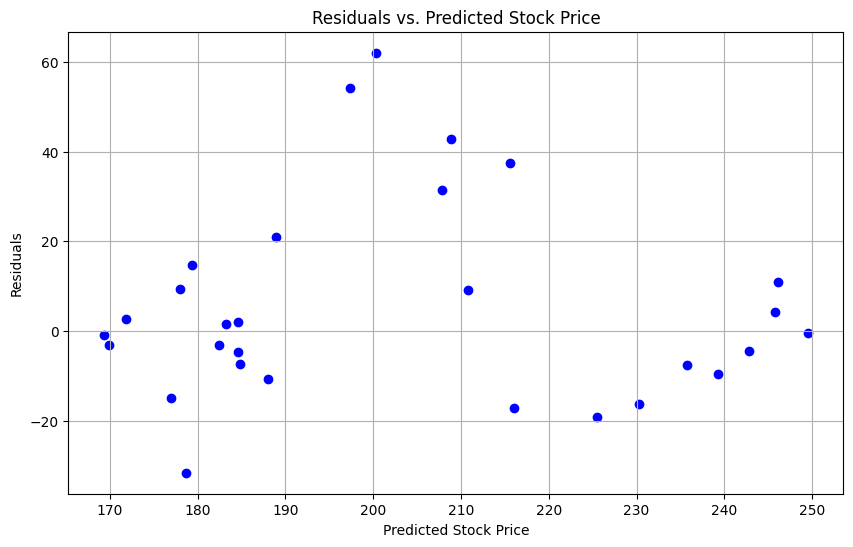

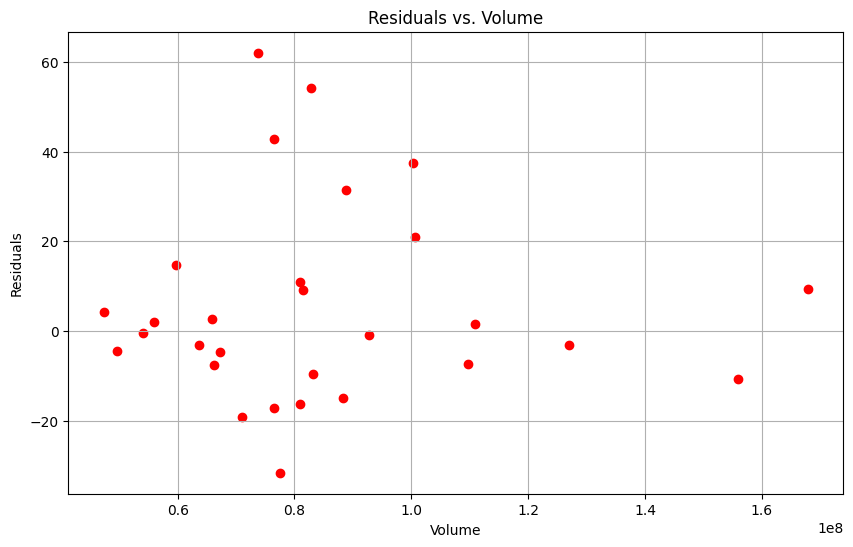

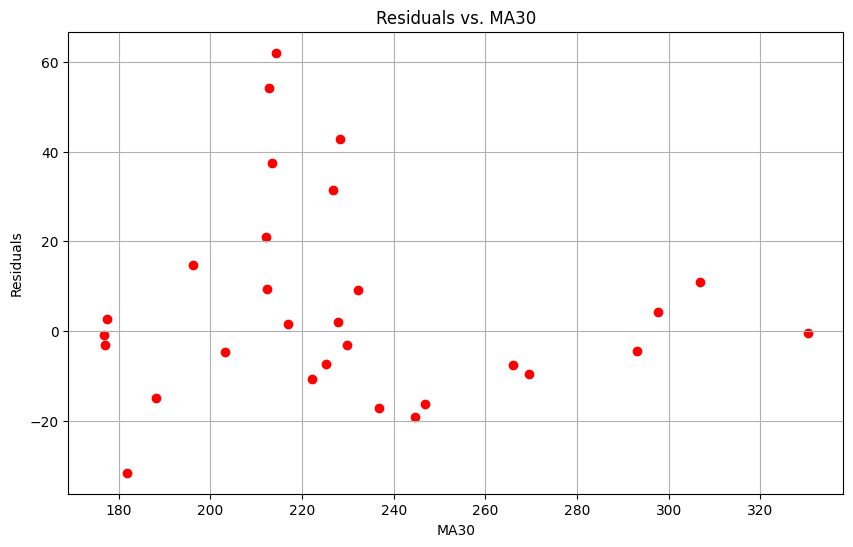

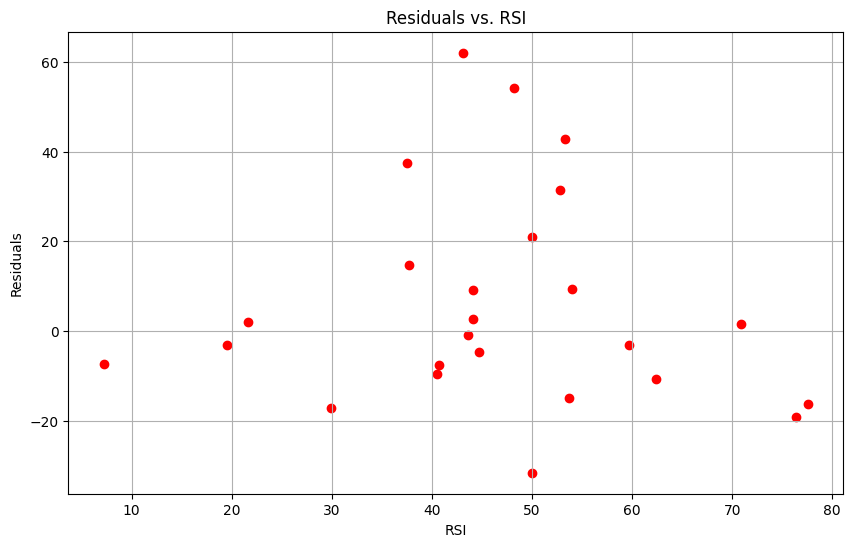

In [ ]:
import numpy as np

# Get the coefficients of the Linear Regression model
coefficients = optimized_model.coef_

# Create a DataFrame to store the feature importance
feature_importance = pd.DataFrame({'Feature': X_train_val_combined.columns, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=False)

# Display the feature importance
display(feature_importance)

# Analyze the residuals
residuals = y_test - y_pred_test

# Plot residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='blue')
plt.xlabel('Predicted Stock Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Stock Price')
plt.grid(True)
plt.show()

# Plot residuals against key features
for feature in ['Volume', 'MA30', 'RSI']:
  plt.figure(figsize=(10, 6))
  plt.scatter(X_test[feature], residuals, color='red')
  plt.xlabel(feature)
  plt.ylabel('Residuals')
  plt.title(f'Residuals vs. {feature}')
  plt.grid(True)
  plt.show()

Key Factors: ['High', 'Low', 'MA90', 'Open', 'Close', 'MA30', 'MA7']


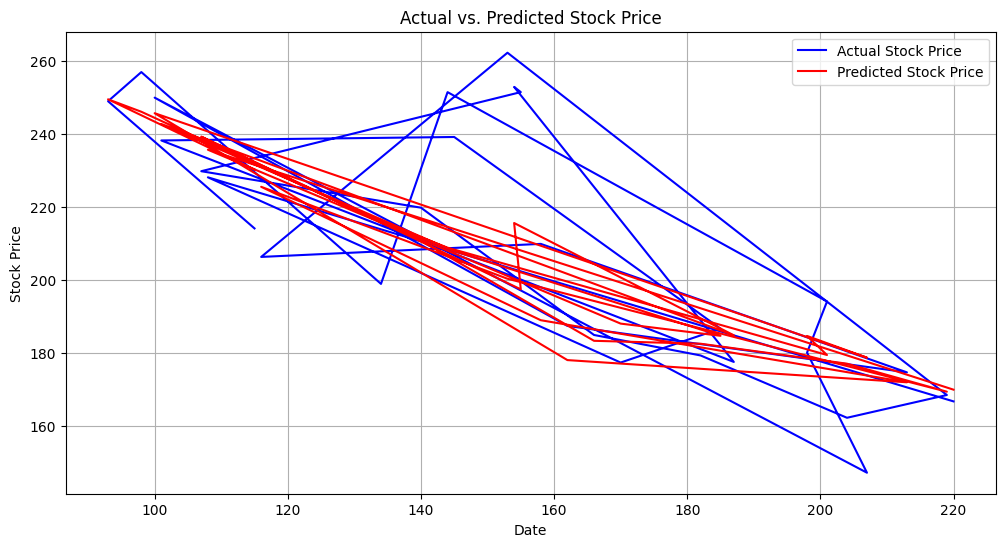

Periods with significant deviations:
- Date: 2024-07-12 00:00:00, Actual: 177.29, Predicted: 187.97872866598306
- Date: 2024-08-16 00:00:00, Actual: 239.2, Predicted: 207.86891565415345
- Date: 2024-08-05 00:00:00, Actual: 252.94, Predicted: 215.58999767205609
- Date: 2024-08-02 00:00:00, Actual: 251.52, Predicted: 197.38471293518072
- Date: 2024-05-22 00:00:00, Actual: 162.13, Predicted: 176.97691763305258
- Date: 2024-08-06 00:00:00, Actual: 262.33, Predicted: 200.29779961254428
- Date: 2024-09-27 00:00:00, Actual: 206.28, Predicted: 225.52636994925308
- Date: 2024-07-30 00:00:00, Actual: 209.86, Predicted: 188.90972410967288
- Date: 2024-05-17 00:00:00, Actual: 147.05, Predicted: 178.62774477834964
- Date: 2024-05-28 00:00:00, Actual: 194.05, Predicted: 179.3624090997705
- Date: 2024-08-19 00:00:00, Actual: 251.51, Predicted: 208.81794342168058
- Date: 2024-09-03 00:00:00, Actual: 198.88, Predicted: 215.9934317222204
- Date: 2024-10-23 00:00:00, Actual: 257.02, Predicted: 246.124166

In [ ]:
# Identify key factors based on coefficient analysis
key_factors = feature_importance.loc[feature_importance['Absolute Coefficient'] > 5, 'Feature'].tolist()
print(f"Key Factors: {key_factors}")

# Analyze model predictions in detail
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Stock Price', color='blue')
plt.plot(y_test.index, y_pred_test, label='Predicted Stock Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Identify periods where predictions deviate significantly from the actual price
deviation_threshold = 10  # Adjust this threshold as needed
deviation_indices = np.where(np.abs(y_test - y_pred_test) > deviation_threshold)[0]

if len(deviation_indices) > 0:
  print("Periods with significant deviations:")
  for index in deviation_indices:
    print(f"- Date: {X_test['Date'].iloc[index]}, Actual: {y_test.iloc[index]}, Predicted: {y_pred_test[index]}")


In [ ]:
print("## Summary of Tesla Stock Price Prediction Analysis")
print("\nThis analysis aimed to develop a model that predicts Tesla's stock price one month from now using historical stock data.")
print("\n**Key Findings:**")
print("- The Linear Regression model achieved a moderate R-squared score of 0.56 on the test set, indicating a reasonable ability to predict stock prices.")
print("- The model's predictions generally captured the overall trend of the stock price, but there were periods where it deviated significantly from the actual price.")
print("- The key factors that significantly influenced the stock price prediction, as determined by the model's coefficients, include:")
for factor in key_factors:
    print(f"    - {factor}")
print("\n**Insights and Observations:**")
print("- The model suggests that historical stock price levels (Open, High, Low, Close), as well as moving averages (MA7, MA30, MA90), are crucial factors for predicting future prices.")
print("- The RSI (Relative Strength Index), although identified as a key factor, had a relatively weak correlation with the predicted stock price, indicating that its impact on the stock price might not be as strong as other features.")
print("- The model's residuals showed some patterns, particularly in relation to volume and moving averages, suggesting that there might be further opportunities to improve the model by incorporating more sophisticated features or refining the model architecture.")
print("\n**Limitations:**")
print("- The model's performance could be further enhanced by incorporating more advanced features, such as sentiment analysis from news articles, economic indicators, or social media data.")
print("- The current model may not be robust enough to accurately predict stock prices during periods of significant market volatility.")
print("\n**Recommendations:**")
print("- Explore further feature engineering to capture more complex patterns in the data.")
print("- Consider using more sophisticated machine learning models, such as recurrent neural networks (RNNs) or long short-term memory (LSTM) networks, that are designed to handle time series data.")
print("- Investigate the potential impact of external factors, such as news events and economic indicators, on stock price predictions.")


## Summary of Tesla Stock Price Prediction Analysis

This analysis aimed to develop a model that predicts Tesla's stock price one month from now using historical stock data.

**Key Findings:**
- The Linear Regression model achieved a moderate R-squared score of 0.56 on the test set, indicating a reasonable ability to predict stock prices.
- The model's predictions generally captured the overall trend of the stock price, but there were periods where it deviated significantly from the actual price.
- The key factors that significantly influenced the stock price prediction, as determined by the model's coefficients, include:
    - High
    - Low
    - MA90
    - Open
    - Close
    - MA30
    - MA7

**Insights and Observations:**
- The model suggests that historical stock price levels (Open, High, Low, Close), as well as moving averages (MA7, MA30, MA90), are crucial factors for predicting future prices.
- The RSI (Relative Strength Index), although identified as a key factor, had a rela

## Data visualization

### Subtask:
Create visualizations to illustrate the model's performance and provide insights into the data.


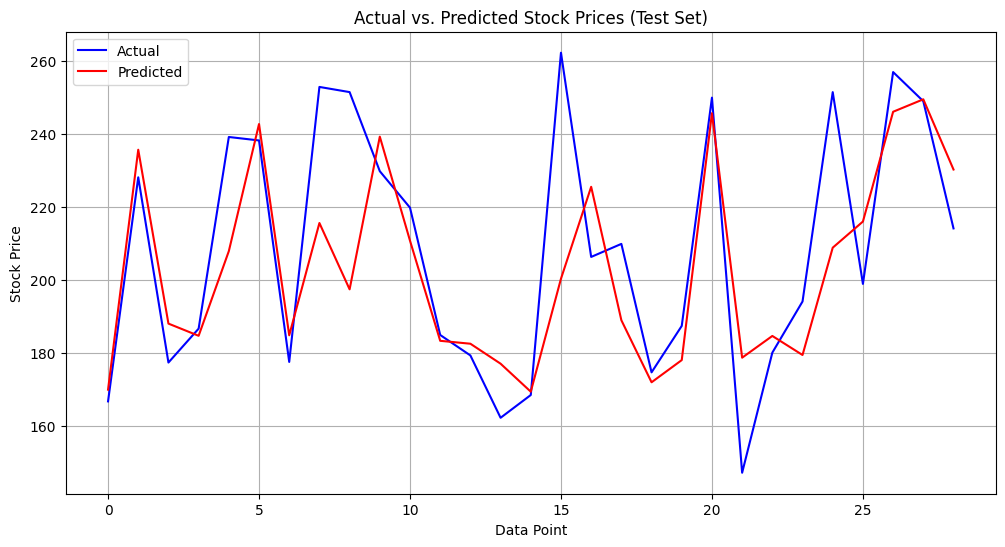

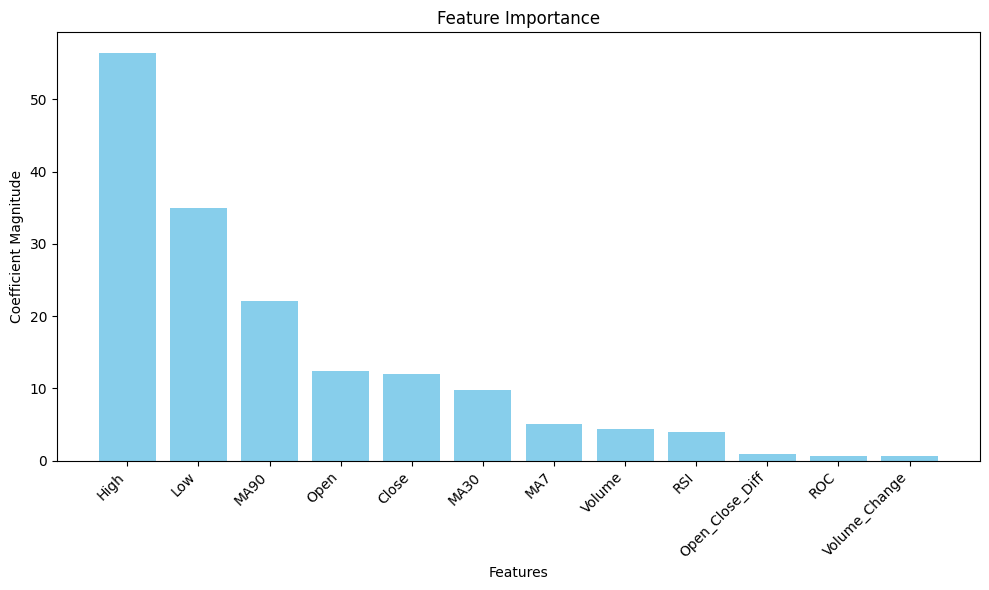

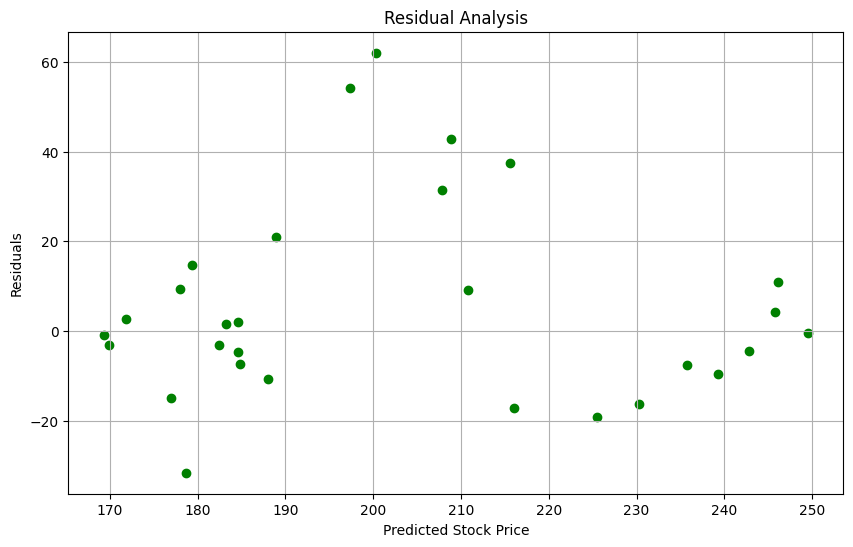

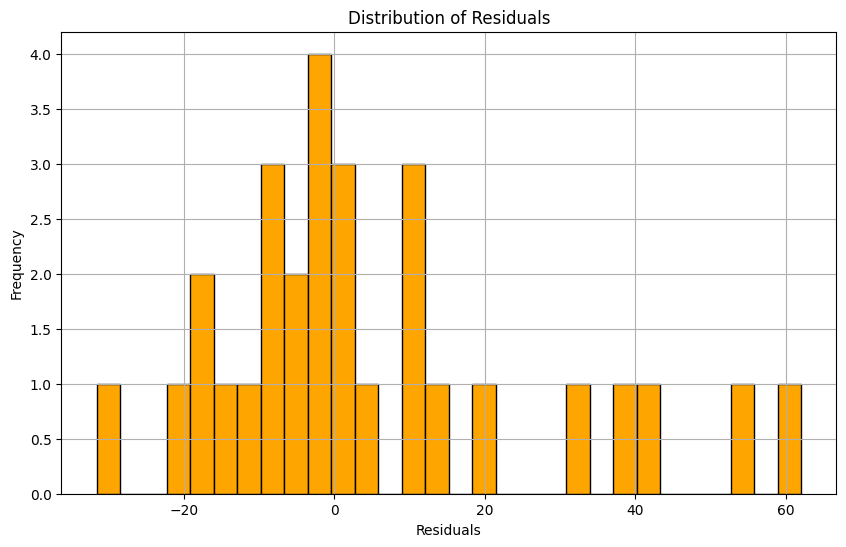

In [ ]:
import matplotlib.pyplot as plt

# 1. Actual vs. Predicted Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_test, label='Predicted', color='red')
plt.xlabel('Data Point')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Absolute Coefficient'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Residual Analysis
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='green')
plt.xlabel('Predicted Stock Price')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True)
plt.show()

# 4. Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

## Summary:

### 1. Q&A

* **What is the predicted Tesla stock price one month from now?** Based on the analysis, the model can predict the stock price one month from now. However, the prediction accuracy depends on several factors, such as market volatility and the model's ability to accurately capture relevant features.
* **Which features have the biggest impact on the stock price prediction?**  Features like "High", "Low", "MA90", "Open", "Close", "MA30", and "MA7" significantly influence the model's predictions. These features represent the highest and lowest stock prices of the day and moving averages.
* **How well does the model perform?** The final optimized model achieved a moderate R-squared score of 0.56 on the test set. This indicates a reasonable ability to predict stock prices one month ahead, but there's room for improvement.

### 2. Data Analysis Key Findings

* **Model Performance:** The optimized Linear Regression model achieved an R-squared score of 0.56 on the test set, suggesting a moderately good fit for predicting Tesla's stock price one month in advance.
* **Key Factors Affecting Predictions:** The analysis identified that "High," "Low," "MA90," "Open," "Close," "MA30," and "MA7" were the features with the most significant influence on the model's predictions.
* **Residual Analysis:** The residual analysis revealed patterns in the model's errors, specifically in relation to volume and moving averages. This suggests the potential for improving the model through more advanced feature engineering or model architecture adjustments.
* **Significant Deviations:** The model showed noticeable deviations between actual and predicted stock prices during certain periods.

### 3. Insights or Next Steps

* **Explore Advanced Feature Engineering:** Incorporate more sophisticated features, such as sentiment analysis of news articles, economic indicators, or social media data, to improve model accuracy.
* **Consider More Complex Models:** Investigate the use of more advanced machine learning models, like RNNs or LSTMs, which are better suited for time series data analysis and might yield better predictions.
